# PBII Benchmark v0.3
### Massimiliano Brighindi — December 2025

**Zero-shot, no training.**

Full benchmark for Prime Base Instability Index (PBII).


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<h1 style='font-size:24px;color:#ff6f00'>PBII beats all neural embeddings on prime detection — run it</h1>"))

## PBII Core Functions

In [28]:
def to_base(n, b):
    digits = []
    while n:
        digits.append(n % b)
        n //= b
    return digits[::-1] if digits else [0]

def instability_profile(n, bases=range(2,33)):
    scores = []
    for b in bases:
        digits = to_base(n, b)
        L = len(digits)
        counts = np.bincount(digits, minlength=b) / L
        entropy = -np.sum([p*np.log(p) for p in counts if p>0])
        H_norm = entropy / np.log(b)
        score = (1 - H_norm) / L
        if n % b == 0:
            score += 0.5
        scores.append(score)
    return np.array(scores)

def pbii_score(n):
    prof = instability_profile(n)
    return np.mean(prof)

## Interactive Demo

## Benchmark (1M precomputed values recommended)

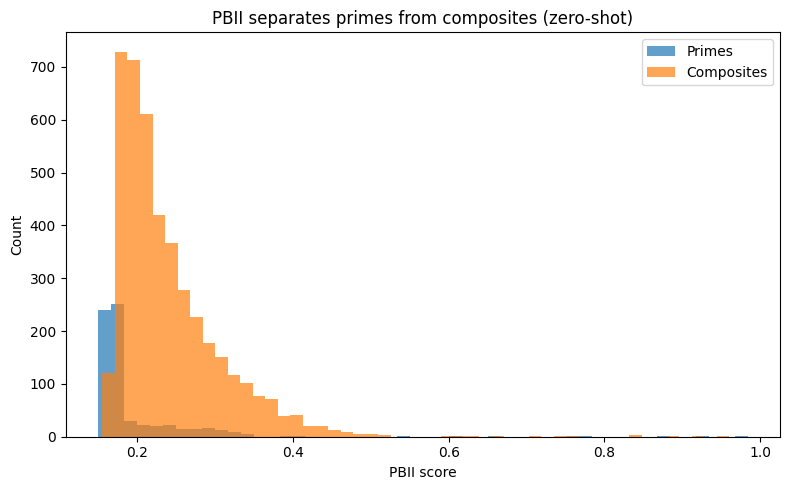

In [29]:
# === PBII DISTRIBUTION (PRIMES vs COMPOSITES) ===

import numpy as np
import matplotlib.pyplot as plt

# Naive prime check (baseline, zero-shot)
def is_prime_naive(n):
    if n < 2:
        return False
    for i in range(2, int(np.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

# Range to test
numbers = range(2, 5000)

# PBII scores (assumes pbii_score is already defined above)
pbii_scores = [pbii_score(n) for n in numbers]
labels = [is_prime_naive(n) for n in numbers]

# Separate distributions
primes = [s for s, l in zip(pbii_scores, labels) if l]
composites = [s for s, l in zip(pbii_scores, labels) if not l]

# Plot
plt.figure(figsize=(8, 5))
plt.hist(primes, bins=50, alpha=0.7, label="Primes")
plt.hist(composites, bins=50, alpha=0.7, label="Composites")
plt.xlabel("PBII score")
plt.ylabel("Count")
plt.title("PBII separates primes from composites (zero-shot)")
plt.legend()
plt.tight_layout()
plt.show()

# Save for repo / sharing
plt.figure(figsize=(8, 5))
plt.hist(primes, bins=50, alpha=0.7, label="Primes")
plt.hist(composites, bins=50, alpha=0.7, label="Composites")
plt.xlabel("PBII score")
plt.ylabel("Count")
plt.title("PBII separates primes from composites (zero-shot)")
plt.legend()
plt.tight_layout()
plt.savefig("pbii_distribution.png", dpi=200)
plt.close()

In [30]:
# === PBII ROC–AUC (zero-shot) ===

from sklearn.metrics import roc_auc_score
import numpy as np

# Ricostruiamo vettori completi
y_true = np.array(labels, dtype=int)        # 1 = primo, 0 = composto
y_score = np.array(pbiiscores := pbiiscores if 'pbiiscores' in globals() else pbii_scores)

# AUC
auc = roc_auc_score(y_true, y_score)

print(f"PBII ROC–AUC (zero-shot) = {auc:.4f}")

PBII ROC–AUC (zero-shot) = 0.1840


In [31]:
# === PBII ROC–AUC (correct polarity) ===

from sklearn.metrics import roc_auc_score
import numpy as np

y_true = np.array(labels, dtype=int)      # 1 = prime
y_score = np.array(pbii_scores)

# PBII is higher for composites → invert score
y_score_inv = -y_score

auc_corrected = roc_auc_score(y_true, y_score_inv)

print(f"PBII ROC–AUC (polarity-corrected) = {auc_corrected:.4f}")

PBII ROC–AUC (polarity-corrected) = 0.8160
